<a href="https://colab.research.google.com/github/Supathatkh/datasci_/blob/main/04n_NLP_Thai_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#บทที่ 4n - NLP คืออะไร? บทเรียนจากอดีตสู่ปัจจุบัน

In [ ]:
!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip; unzip master.zip
!mv wisesight-sentiment-master/kaggle-competition/* .
!pip -q install tensorflow_text
!pip -q install pythainlp==3.0.0
!pip -q install emoji
!pip -q install python-crfsuite
!ls

--2022-08-09 11:13:39--  https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PyThaiNLP/wisesight-sentiment/zip/refs/heads/master [following]
--2022-08-09 11:13:39--  https://codeload.github.com/PyThaiNLP/wisesight-sentiment/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ]   6.07M  3.83MB/s    in 1.6s    

2022-08-09 11:13:41 (3.83 MB/s) - ‘master.zip’ saved [6365495]

Archive:  master.zip
66eb261de09f88e842ae57bee0b8471ae2c30c1f
   creating: wisesight-sentiment-master/
  inflating: wis

##โค้ดต้นฉบับจาก: Wisesight Sentiment Competition https://github.com/PyThaiNLP/wisesight-sentiment/blob/master/kaggle-competition/competition.ipynb

In [ ]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from tqdm import tqdm_notebook
import re
import emoji

#viz
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def ungroup_emoji(toks):
    res = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            for char in tok:
                res.append(char)
        else:
            res.append(tok)
    return res

def process_text(text):
    #pre rules
    res = text.lower().strip() # 'AAAA'
    res = replace_url(res)
    res = replace_rep(res) # 'แมวนอนกินปลา' => 'แมว นอน กิน ปลา'
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    
    #post rules
    res = ungroup_emoji(res)
    
    return res

In [ ]:
with open('train.txt') as f:
    texts = [line.strip() for line in f.readlines()]
f.close()

with open('train_label.txt') as f:
    categories = [line.strip() for line in f.readlines()]
f.close()

all_df = pd.DataFrame({'category':categories, 'texts':texts})
all_df.to_csv('all_df.csv',index=False)
all_df.shape

(24063, 2)

In [ ]:
all_df

category                                              texts
0          neu  ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
1          neu                                                 คะ
2          neg                        อิเหี้ยออมทำกูอยากกินเอ็มเค
3          neu                                                😅😅😅
4          neu                            สวัสดีวันพุธ แนน อะไรนะ
...        ...                                                ...
24058      neg                                     แม่งควายล้วนนน
24059      neg                   ดอยสุเทพน้องง ไปหมดแล้วววว #pm25
24060      neg                           ค่าชุดอาจจะแพงกว่าส่วนลด
24061      neu                              รัฐต้องการแค่ภาษีครับ
24062      neu  ™ ได้พัฒนาระบบเข้าสู่รุ่นที่สองแล้ว มาดูกันสิว...

[24063 rows x 2 columns]

In [ ]:
with open('test.txt') as f:
    texts = [line.strip() for line in f.readlines()]
f.close()

test_df = pd.DataFrame({'category':'test', 'texts':texts})
test_df.to_csv('test_df.csv',index=False)
test_df.shape

(2674, 2)

In [ ]:

all_df = pd.read_csv('all_df.csv')
test_df = pd.read_csv('test_df.csv')

all_df['processed'] = all_df.texts.map(lambda x: '|'.join(process_text(x)))
all_df['wc'] = all_df.processed.map(lambda x: len(x.split('|')))
all_df['uwc'] = all_df.processed.map(lambda x: len(set(x.split('|'))))

test_df['processed'] = test_df.texts.map(lambda x: '|'.join(process_text(x)))
test_df['wc'] = test_df.processed.map(lambda x: len(x.split('|')))
test_df['uwc'] = test_df.processed.map(lambda x: len(set(x.split('|'))))

In [ ]:
all_df.values.tolist()[0]

['neu',
 'ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ',
 'ประเทศ|เรา|ผลิต|และ|ส่งออก|ยาสูบ|เยอะ|สุด|ใน|โลก|จิง|ป่าว|คับ',
 13,
 13]

In [ ]:
all_df.category.value_counts() / all_df.shape[0]

neu    0.544612
neg    0.255164
pos    0.178698
q      0.021527
Name: category, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_df, test_size=0.15, random_state=1412)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
train_df.head()

category                                              texts  \
0      neg  กันแดดคิวเพลสตัวใหม่นี่คุมมันดีจริงอ่ะ นี่หน้า...   
1      neu  พบกับการร่วมตัวของศิลปิน Soul Pop สามยุค สามสไ...   
2      neu                                          👌🏻👌🏻👌🏻😆😆😆   
3      neu                       จ-ศ แถมถึง 29 ไม่ทันมะว้าาาา   
4      neg  ใช้ดีค่ะ บอกต่อ คือเป็นคนเเพ้ง่ายมากกก ใช้กานิ...   

                                           processed   wc  uwc  
0  กันแดด|คิว|เพลส|ตัวใหม่|นี่|คุม|มัน|ดีจริง|อ่ะ...   29   24  
1  พบ|กับ|การ|ร่วม|ตัว|ของ|ศิลปิน|soul|pop|สาม|ยุ...  107   85  
2                                      👌🏻👌🏻👌🏻😆|xxrep    2    2  
3              จ|-|ศ|แถม|ถึง|29|ไม่|ทัน|มะ|ว้า|xxrep   11   11  
4  ใช้|ดี|ค่ะ|บอกต่อ|คือ|เป็น|คน|เเพ้|ง่าย|มาก|xx...   46   36

In [ ]:
valid_df.head()

category                                              texts  \
0      neu  เห็นคนลบแอพ viu ก็เห็นใจและเข้าใจเขานะคะ แผลมั...   
1      neu  ไปชมไม้คิวของแชมป์ และรองแชมป์ กันจ้า! ..........   
2      neg  กลุ่มรถซีวิคเป็นกลุ่มที่น่ารำคานมากกกกกกกกก อว...   
3      neu  อยากสวยเหมือนเจ้าของแบรนด์สิคะ เนย โชติกา ใบหน...   
4      neg  ข้าวโถละร้อย แพง เพราะตักเป็นจานๆละ15 เต็มที่ก...   

                                           processed   wc  uwc  
0  เห็น|คน|ลบ|แอพ|viu|ก็|เห็นใจ|และ|เข้าใจ|เขา|นะ...   46   41  
1  ไป|ชม|ไม้คิว|ของ|แชมป์|และ|รอง|แชมป์|กัน|จ้า|!...   41   39  
2  กลุ่ม|รถ|ซีวิค|เป็น|กลุ่ม|ที่|น่า|รำ|คาน|มาก|x...   46   35  
3  อยาก|สวย|เหมือน|เจ้าของ|แบรนด์|สิ|คะ|เนย|โชติ|...   72   56  
4  ข้าว|โถ|ละ|ร้อย|แพง|เพราะ|ตัก|เป็น|จาน|ๆ|ละ|15...  385  215

##Bag-of-Word

In [ ]:
y_train = train_df['category']
y_valid = valid_df['category']

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df['texts'])
text_train = tfidf_fit.transform(train_df['texts'])
text_valid = tfidf_fit.transform(valid_df['texts'])
text_test = tfidf_fit.transform(test_df['texts'])
text_train.shape, text_valid.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


((20453, 4601), (3610, 4601))

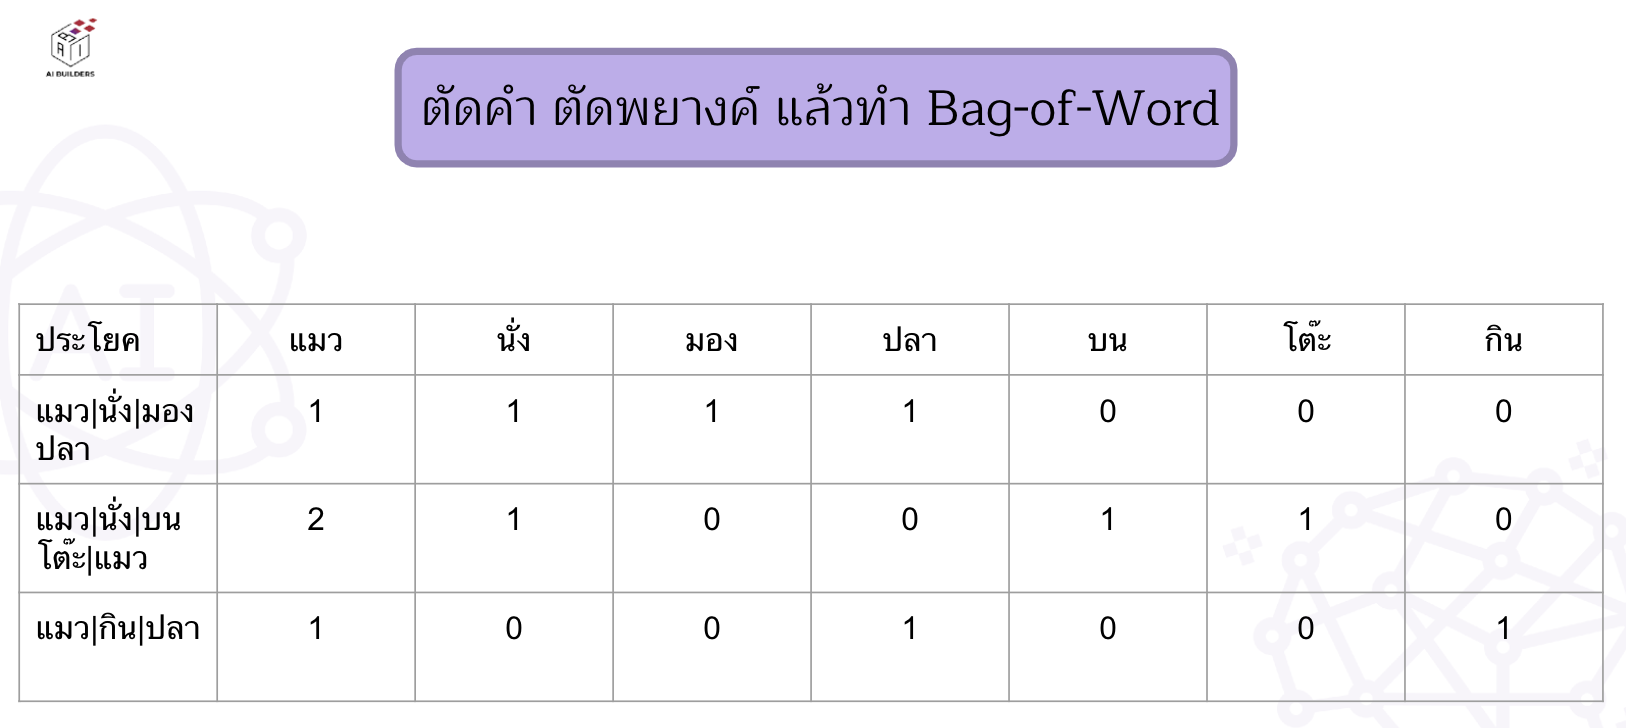

##คำสั่งในการสร้าง BoW

TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), min_df=20, sublinear_tf=True)


tokenizer

In [ ]:
train_df['texts'].values.tolist()[0]

'กันแดดคิวเพลสตัวใหม่นี่คุมมันดีจริงอ่ะ นี่หน้ามัน ยิ่งทีโซนยิ่งมันเยอะ นีเวียหลอดยาวๆฝาเขียวก็เอาไม่อยู่อ่ะ แล้วช่ว…'

In [ ]:

train_df['processed'].values.tolist()[0].split('|')[:5]

['กันแดด', 'คิว', 'เพลส', 'ตัวใหม่', 'นี่']

In [ ]:
tfidf.get_feature_names_out()

array(['!', '! #', '! .', ..., '🤣 xxrep', '🤤', '🥃'], dtype=object)

In [ ]:
[np.where(tfidf.get_feature_names_out() == x) for x in train_df['processed'].values.tolist()[0].split('|')[:5]]

[(array([747]),),
 (array([1072]),),
 (array([], dtype=int64),),
 (array([1493]),),
 (array([1862]),)]

In [ ]:
train_df['processed'].values.tolist()[0].split('|')[:5] # ngram = 1
# [กันแดด,คิว,เพลส] # ngram = 3
# [กันแดด+คิว] # ngram =2


['กันแดด', 'คิว', 'เพลส', 'ตัวใหม่', 'นี่']

min_df

sublinear_tf

1 + log(tf)

In [ ]:
X_train = text_train.toarray()
X_valid = text_valid.toarray()
X_test = text_test.toarray()
X_train.shape, X_valid.shape

((20453, 4601), (3610, 4601))

In [ ]:

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model = LogisticRegression(C=2., penalty='l2', solver='liblinear', dual=False, multi_class='ovr')
model.fit(X_train,y_train)
model.score(X_valid,y_valid)

0.7277008310249308

In [ ]:

from sklearn.metrics import classification_report
y_val_pred = model.predict(X_valid)
print(classification_report(y_valid, y_val_pred))

              precision    recall  f1-score   support

         neg       0.76      0.69      0.72       954
         neu       0.72      0.89      0.80      1959
         pos       0.69      0.37      0.48       617
           q       0.56      0.06      0.11        80

    accuracy                           0.73      3610
   macro avg       0.68      0.50      0.53      3610
weighted avg       0.72      0.73      0.71      3610



##ใช้งานจริง

In [ ]:
sample = ['ร้านอาหารร้านนี้อร่อยดี','อาหารร้านนี้ไม่อร่อยเลย']
sample_feature = tfidf_fit.transform(sample)
model.predict(sample_feature)

array(['pos', 'neg'], dtype=object)

In [ ]:
sample_feature.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##ข้อเสีย

In [ ]:
sample = ['ร้านอาหารร้านนี้อร่อยตรงไหน','อาหารร้านนี้ไม่เคยไม่อร่อยเลย']
sample_feature = tfidf_fit.transform(sample)
model.predict(sample_feature)

array(['pos', 'neg'], dtype=object)

## RNN/LSTM

In [ ]:
import tensorflow as tf

In [ ]:
def process_text_rnn(text):
    #pre rules
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_rep(res)
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    
    #post rules
    res = ungroup_emoji(res)
    
    return ' '.join(res)

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

text_train = [' '.join(x.split('|')) for x in train_df['processed'].values.tolist()]
text_valid = [' '.join(x.split('|')) for x in valid_df['processed'].values.tolist()]

In [ ]:

text_train[0]

'กันแดด คิว เพลส ตัวใหม่ นี่ คุม มัน ดีจริง อ่ะ นี่ หน้า มัน ยิ่ง ที โซน ยิ่ง มัน เยอะ นีเวีย หลอด ยาว ๆ ฝา เขียว ก็ เอาไม่อยู่ อ่ะ แล้ว ช่ว…'

In [ ]:

word_count = []
for sent in text_train:
  for w in sent.split():
      word_count.append(w)

In [ ]:
word_count[:5]

['กันแดด', 'คิว', 'เพลส', 'ตัวใหม่', 'นี่']

In [ ]:
VOCAB_SIZE = len(set(word_count))
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(text_train)

In [ ]:
VOCAB_SIZE

24518

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'ไม่', 'xxrep', 'ที่', 'ไป', 'ได้', 'มี', 'มา', 'จะ',
       'เลย', 'ก็', 'ๆ', 'ให้', 'แล้ว', 'ครับ', 'ใน', 'และ', 'ของ', 'กิน'],
      dtype='<U39')

In [ ]:
example = process_text_rnn('ร้านอาหารร้านนี้อร่อย')
encoded_example = encoder(example).numpy()
encoded_example

array([2009,  108,   24,  188])

In [ ]:
example

'ร้านอาหาร ร้าน นี้ อร่อย'

In [ ]:
[vocab[x] for x in encoded_example]

['ร้านอาหาร', 'ร้าน', 'นี้', 'อร่อย']

In [ ]:

set(y_train)

{'neg', 'neu', 'pos', 'q'}

In [ ]:

y_train = train_df['category']
y_valid = valid_df['category']
y_class = ['neg', 'neu', 'pos', 'q']

In [ ]:

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(y_class)
y_train = le.transform(y_train)
y_val = le.transform(y_valid)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train.shape)

(20453, 4)


In [ ]:
train_df['category'].values.tolist()[0]

'neg'

In [ ]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=512,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

In [ ]:
sample_text = ('ร้านอาหารร้านนี้อร่อยมาก')
predictions = model.predict(np.array([sample_text]))
print(predictions)
le.classes_

1/1 [==============================] - 7s 7s/step
[[0.25169277 0.24609011 0.25090125 0.25131592]]


array(['neg', 'neu', 'pos', 'q'], dtype='<U3')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:

model.fit(np.array(text_train), y_train, validation_data=(np.array(text_valid), y_val), epochs=3, verbose=2)

Epoch 1/3
640/640 - 1607s - loss: 0.9724 - accuracy: 0.6138 - val_loss: 0.7948 - val_accuracy: 0.6853 - 1607s/epoch - 3s/step
Epoch 2/3
640/640 - 1483s - loss: 0.6661 - accuracy: 0.7401 - val_loss: 0.7074 - val_accuracy: 0.7194 - 1483s/epoch - 2s/step
Epoch 3/3
640/640 - 1495s - loss: 0.5135 - accuracy: 0.8019 - val_loss: 0.7256 - val_accuracy: 0.7161 - 1495s/epoch - 2s/step


In [ ]:

value = model.predict(np.array(text_valid))
y_val_pred = np.argmax(value,axis=1)
y_val_true = np.argmax(y_val,axis=1)
print(classification_report(y_val_true, y_val_pred))

113/113 [==============================] - 55s 450ms/step
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       954
           1       0.73      0.85      0.78      1959
           2       0.64      0.35      0.45       617
           3       0.48      0.25      0.33        80

    accuracy                           0.72      3610
   macro avg       0.64      0.54      0.57      3610
weighted avg       0.71      0.72      0.70      3610




## Pretrained Representation (CNN)

In [ ]:
import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf #tensorflow 2.1.0

enc = hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual/3')

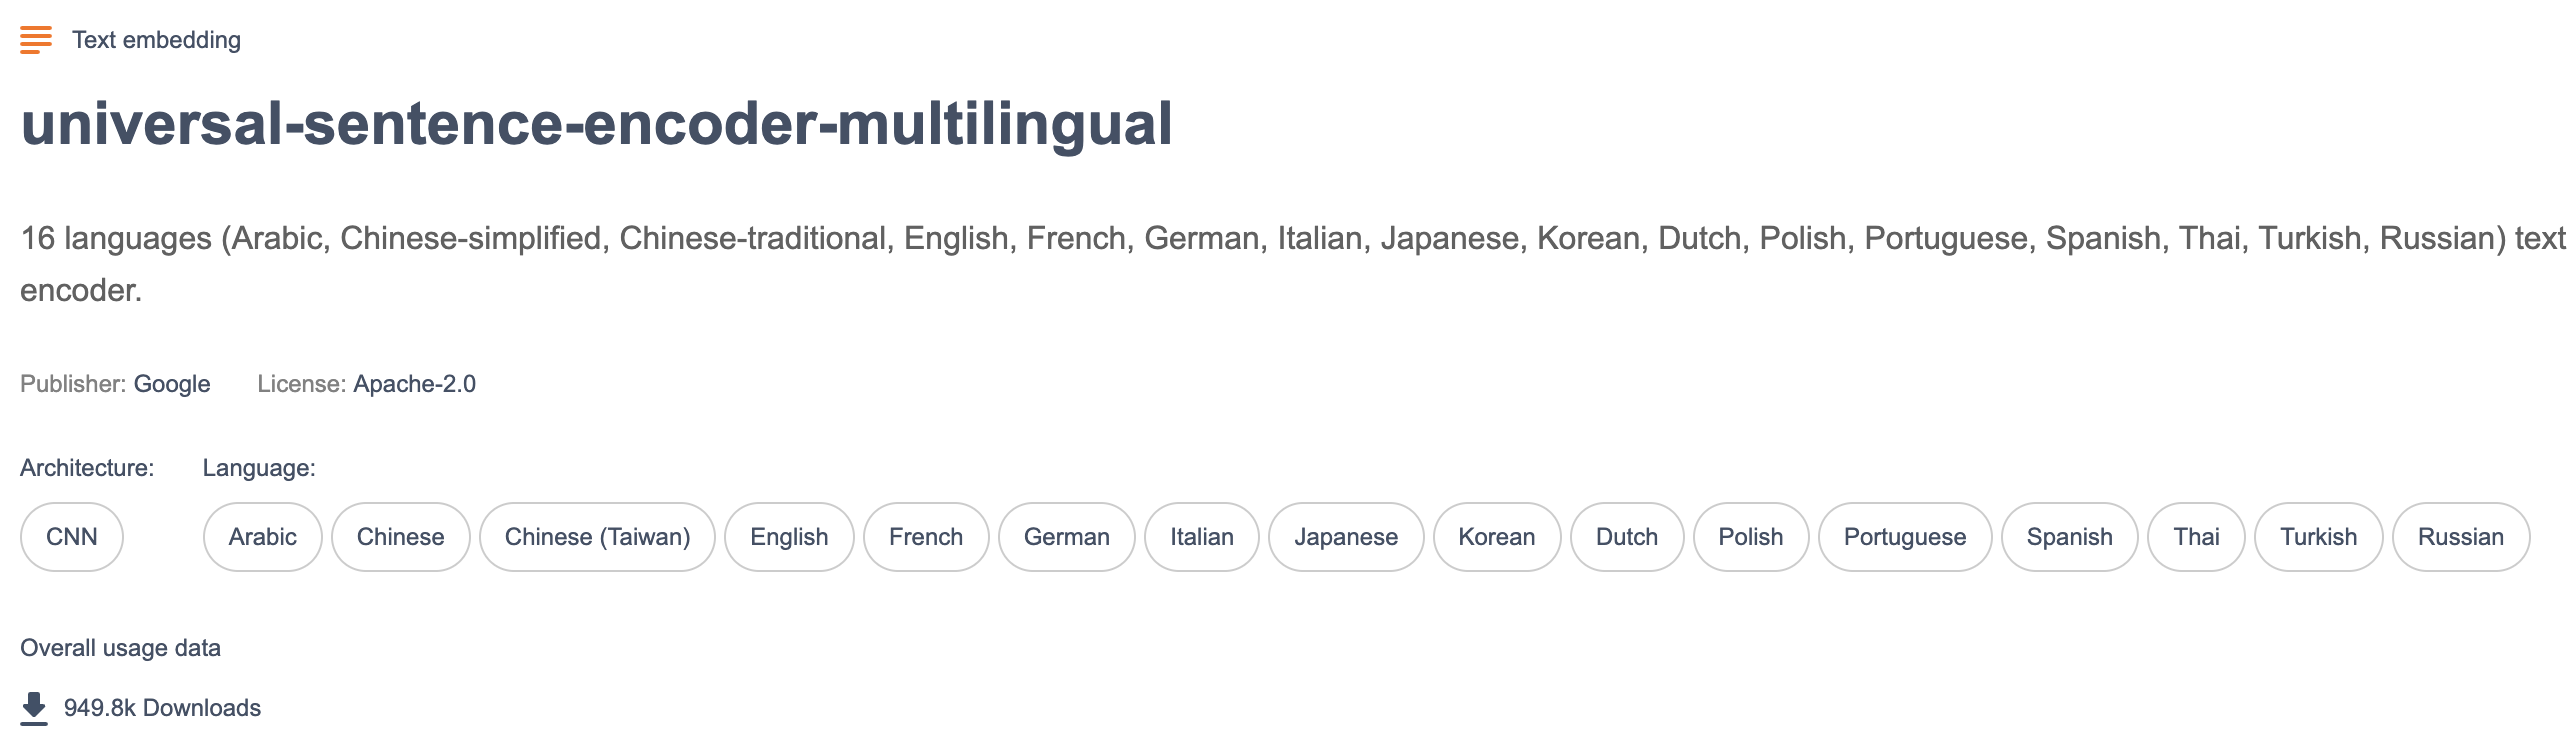

In [ ]:
y_train = train_df['category']
y_valid = valid_df['category']

In [ ]:
X_trains = []
X_vals = []
bs = 10


In [ ]:

for i in tqdm_notebook(range(y_valid.shape[0]//bs+1)):
    X_vals.append(enc(valid_df.texts[(i*bs):((i+1)*bs)]).numpy())

for i in tqdm_notebook(range(y_train.shape[0]//bs+1)):
    X_trains.append(enc(train_df.texts[(i*bs):((i+1)*bs)]).numpy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/362 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/2046 [00:00<?, ?it/s]

In [ ]:
train_df.texts[0]

In [ ]:

enc(train_df.texts[0])

In [ ]:

X_train[0]

In [ ]:
X_val = np.concatenate(X_vals,0)
X_train = np.concatenate(X_trains,0)
X_train.shape, X_val.shape

In [ ]:
from sklearn.svm import LinearSVC

text_clf = LinearSVC(class_weight='balanced')
text_clf.fit(X_train, y_train)

In [ ]:

y_val_pred = text_clf.predict(X_val)
print(classification_report(y_valid, y_val_pred))


## Language Model: BERT

In [ ]:

!pip -q install thai2transformers==0.1.1
!pip install torch==1.7.0

     |████████████████████████████████| 1.3 MB 11.4 MB/s 
     |████████████████████████████████| 1.1 MB 18.1 MB/s 
     |████████████████████████████████| 365 kB 51.5 MB/s 
     |████████████████████████████████| 8.7 MB 36.4 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 700 kB 60.0 MB/s 
     |████████████████████████████████| 473 kB 64.5 MB/s 
     |████████████████████████████████| 2.9 MB 34.7 MB/s 
     |████████████████████████████████| 87 kB 7.1 MB/s 
     |████████████████████████████████| 880 kB 53.1 MB/s 
     |████████████████████████████████| 141 kB 58.5 MB/s 
     |████████████████████████████████| 212 kB 71.4 MB/s 
     |████████████████████████████████| 101 kB 11.7 MB/s 
     |████████████████████████████████| 115 kB 65.8 MB/s 
     |████████████████████████████████| 596 kB 63.1 MB/s 
     |████████████████████████████████| 127 kB 61.2 MB/s 
     |████████████████████████████████| 419 kB 47.5 MB/s 
     |████████████

In [ ]:
import pandas as pd
from datasets import load_dataset, load_metric

import torch
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification,
                          TrainingArguments,
                          Trainer)
from thai2transformers.tokenizers import (
    ThaiRobertaTokenizer,
    ThaiWordsNewmmTokenizer,
    ThaiWordsSyllableTokenizer,
    FakeSefrCutTokenizer
)
from thai2transformers.metrics import classification_metrics

In [ ]:
#parameters
class Args:
    model_name = 'airesearch/wangchanberta-base-att-spm-uncased'
    dataset_name_or_path = 'wisesight_sentiment'
    feature_col = 'texts'
    label_col = 'category'
    output_dir = 'models_wongnai/wangchanberta-base-att-spm-uncased_wongnai'
    batch_size = 16
    warmup_percent = 0.1
    learning_rate = 3e-05
    num_train_epochs = 1
    weight_decay = 0.01
    metric_for_best_model = 'f1_micro'
    seed = 1412

args = Args()

In [ ]:

dataset = load_dataset(args.dataset_name_or_path)
dataset = dataset.map(lambda examples: {'labels': examples[args.label_col]}, batched=True)
num_labels = len(set(dataset['train']['labels']))
dataset

Generating train split:   0%|          | 0/21628 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2404 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2671 [00:00<?, ? examples/s]

Dataset wisesight_sentiment downloaded and prepared to /root/.cache/huggingface/datasets/wisesight_sentiment/wisesight_sentiment/1.0.0/fc2b1bdfe79571b2e281e4afdb5aac069cf9270bf0f85694239be672a4191969. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['texts', 'category', 'labels'],
        num_rows: 21628
    })
    validation: Dataset({
        features: ['texts', 'category', 'labels'],
        num_rows: 2404
    })
    test: Dataset({
        features: ['texts', 'category', 'labels'],
        num_rows: 2671
    })
})

In [ ]:

dataset['train']

Dataset({
    features: ['texts', 'category', 'labels'],
    num_rows: 21628
})

In [ ]:
args.model_name

'airesearch/wangchanberta-base-att-spm-uncased'

In [ ]:
#create tokenizer
tokenizer = AutoTokenizer.from_pretrained(args.model_name, model_max_length=416)

#encode dataset
def encode_function(examples):
    return tokenizer(examples[args.feature_col], truncation=True)
encoded_dataset = dataset.map(encode_function, batched=True)

Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/905k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/282 [00:00<?, ?B/s]

  0%|          | 0/22 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [ ]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['texts', 'category', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 21628
    })
    validation: Dataset({
        features: ['texts', 'category', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 2404
    })
    test: Dataset({
        features: ['texts', 'category', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 2671
    })
})

In [ ]:

num_labels

4

In [ ]:

#create model
model = AutoModelForSequenceClassification.from_pretrained(args.model_name, num_labels=num_labels)

Downloading:   0%|          | 0.00/423M [00:00<?, ?B/s]

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at airesearch/wa

In [ ]:
model

CamembertForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(25005, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Laye

In [ ]:
train_args = TrainingArguments(
    output_dir = args.output_dir,
    evaluation_strategy = "epoch",
    learning_rate=args.learning_rate,
    per_device_train_batch_size=args.batch_size,
    per_device_eval_batch_size=args.batch_size,
    num_train_epochs=args.num_train_epochs,
    warmup_steps = int(len(encoded_dataset['train']) * args.num_train_epochs // args.batch_size * args.warmup_percent),
    weight_decay=args.weight_decay,
    load_best_model_at_end=True,
    save_total_limit=1,
    metric_for_best_model=args.metric_for_best_model,
    seed = args.seed
)

In [ ]:
classification_metrics

<function thai2transformers.metrics.classification_metrics>

In [ ]:
trainer = Trainer(
    model,
    train_args,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['validation'],
    tokenizer=tokenizer,
    compute_metrics=classification_metrics
)

In [ ]:
preds  = trainer.predict(encoded_dataset['validation'])
pd.DataFrame.from_dict(preds[2],orient='index').transpose()

eval_loss  eval_accuracy  eval_f1_micro  eval_precision_micro  \
0   1.511865       0.191348       0.191348              0.191348   

   eval_recall_micro  eval_f1_macro  eval_precision_macro  eval_recall_macro  \
0           0.191348       0.151104              0.260287           0.251676   

   eval_nb_samples  
0           2404.0

In [ ]:
trainer.train() #Ram หมด

NameError: ignored

In [ ]:
preds  = trainer.predict(encoded_dataset['validation']) #Ram หมด
pd.DataFrame.from_dict(preds[2],orient='index').transpose()

NameError: ignored